# VECM

In [1]:
def get_ytw():
    import nb_credit_spread as cslibrary
    from statsmodels.tsa.arima.model import ARIMA

    cslib = cslibrary.creditspread()
    start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'

    ytw = cslib.get_ytw_from_date_delta(start=start_date)
    return ytw

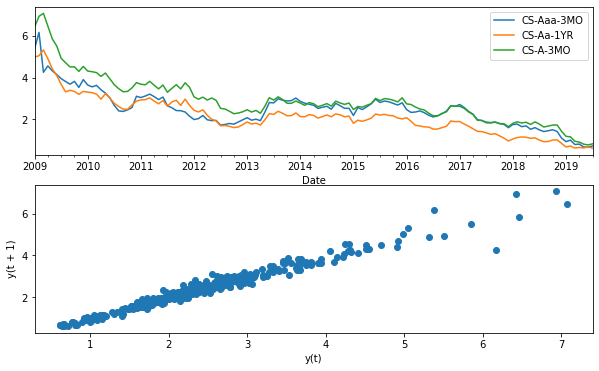

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
# ds = get_ytw()[ ['CS-Aaa-3MO', 'CS-Aa-1YR', 'CS-A-3MO', 'CS-Baa-3MO'] ]
# 'Econ-DSPIC96', 'Econ-CPIAUCSL', 'Econ-CPILFESL', 'Econ-INDPRO', 'Econ-PCE', 'Econ-UNRATE'
# 'Market-RMRF'

var1, var2, var3 = 'CS-Aaa-3MO', 'CS-Aa-1YR', 'CS-A-3MO'

ds = get_ytw() [ [var1, var2, var3]]
ds.plot(ax=ax1)
pd.plotting.lag_plot(ds)
plt.show()

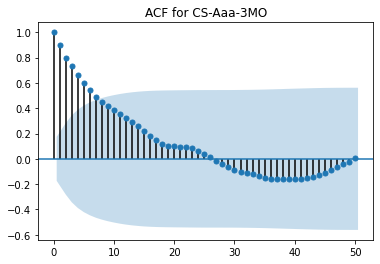

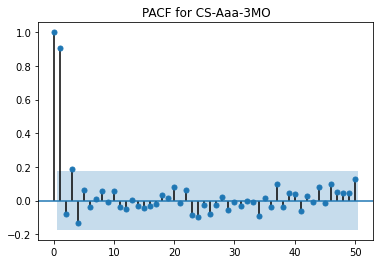

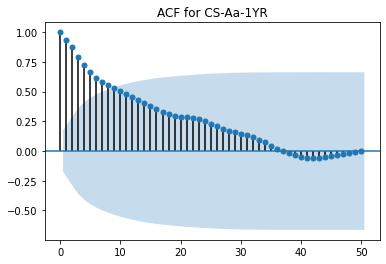

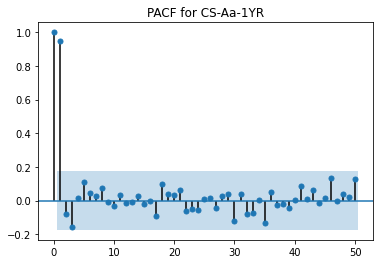

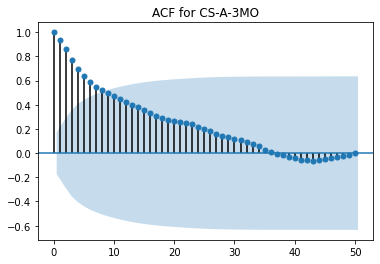

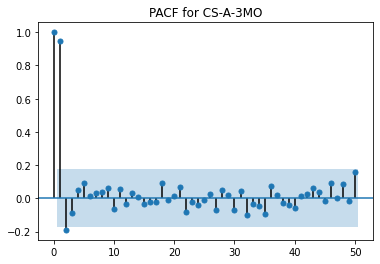

In [3]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplt

for i in ds:
    tsaplt.plot_acf(ds[i], lags = 50)
    plt.title(f"ACF for {i}")
    plt.show()
    tsaplt.plot_pacf(ds[i], lags = 50)
    plt.title(f"PACF for {i}")
    plt.show()


## Stationarity test with adfuller

In [4]:
def adf_statistics(time_series):
    import statsmodels.tsa.stattools as stats

    result = stats.adfuller(time_series.values)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]:.5f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        # print('\t%s: %.3f' % (key, value))
        print(f"\t{key}: {value:.3f}")

import numpy as np
for i in ds:
    print(f"{'*'*10} {i} {'*'*10}")
    adf_statistics(ds[i])
    adf_statistics(ds[i].diff(periods=1).dropna())
    df_log = np.log(ds[i]).diff(periods=1).dropna()
    print(f"log {i}\n{df_log.describe()}")
    adf_statistics(df_log)

********** CS-Aaa-3MO **********
ADF Statistic: -1.8176788099777936
p-value: 0.37172
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580
ADF Statistic: -5.038539389994268
p-value: 0.00002
Critical Values:
	1%: -3.485
	5%: -2.886
	10%: -2.580
log CS-Aaa-3MO
count    126.000000
mean      -0.016023
std        0.081553
min       -0.371661
25%       -0.054661
50%       -0.018953
75%        0.028869
max        0.192959
Name: CS-Aaa-3MO, dtype: float64
ADF Statistic: -6.899442855791534
p-value: 0.00000
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579
********** CS-Aa-1YR **********
ADF Statistic: -2.8680324453015467
p-value: 0.04919
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579
ADF Statistic: -10.004071146290862
p-value: 0.00000
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579
log CS-Aa-1YR
count    126.000000
mean      -0.016705
std        0.069357
min       -0.227645
25%       -0.063090
50%       -0.017824
75%        0.032739
max        0.144187
Name: CS-Aa-1YR, dtype: f

## split data with last 10 as test data

In [5]:
nobs = 10
train, test = ds[0:-nobs], ds[-nobs:]

print(f"total: {ds.shape}")
print(f"train: {train.shape}")
print(f"test: {test.shape}")
print(test.describe())

total: (127, 3)
train: (117, 3)
test: (10, 3)
       CS-Aaa-3MO  CS-Aa-1YR   CS-A-3MO
count   10.000000  10.000000  10.000000
mean     0.952400   0.736700   1.139800
std      0.298322   0.154787   0.366744
min      0.653000   0.608000   0.762000
25%      0.732250   0.625000   0.836750
50%      0.861500   0.666500   1.047000
75%      1.065750   0.804500   1.355250
max      1.493000   1.006000   1.721000


## transform series to log values and 1 period difference

       CS-Aaa-3MO   CS-Aa-1YR    CS-A-3MO
count  117.000000  117.000000  117.000000
mean     0.916976    0.743767    1.059312
std      0.278685    0.372286    0.316472
min      0.340037   -0.087739    0.484276
25%      0.692647    0.518794    0.867100
50%      0.925052    0.754242    1.020290
75%      1.061948    0.985444    1.246745
max      1.819050    1.672225    1.957274
       CS-Aaa-3MO   CS-Aa-1YR    CS-A-3MO
count  116.000000  116.000000  116.000000
mean    -0.011339   -0.014500   -0.011610
std      0.074873    0.064164    0.057608
min     -0.371661   -0.175729   -0.142280
25%     -0.054096   -0.061310   -0.050321
50%     -0.018953   -0.017824   -0.018797
75%      0.028338    0.028660    0.033069
max      0.192959    0.144187    0.146048


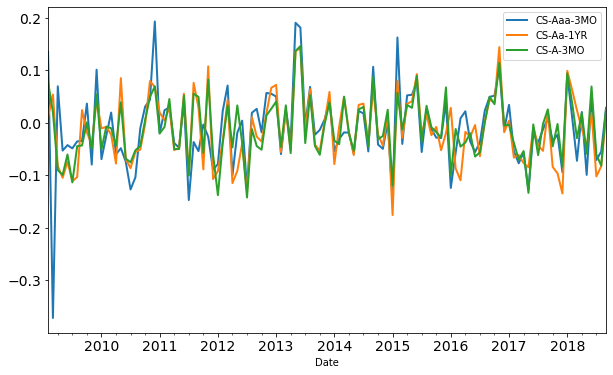

In [6]:
import numpy as np
import pandas as pd

train_log = np.log(train)
train_log = train_log.asfreq(pd.infer_freq(train_log.index))
print(train_log.describe())

train_log_diff = (train_log).diff(periods=1).dropna()
print(train_log_diff.describe())

train_log_diff.plot(figsize=(10,6), linewidth=2, fontsize=14)
plt.show()

## ACF of log diff transformation

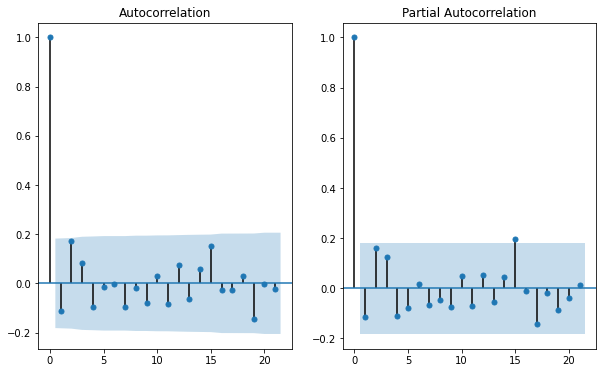

In [8]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
ax[0] = tsaplt.plot_acf(train_log_diff[var1], ax=ax[0])
ax[1] = tsaplt.plot_pacf(train_log_diff[var1], ax=ax[1])

## ADF for transformation

In [9]:
import numpy as np
series = train_log_diff
for i in ds:
    print(f"{'*'*10} {i} {'*'*10}")
    adf_statistics(series[i])
    # print(f"log {i}\n{df_log.describe()}")

********** CS-Aaa-3MO **********
ADF Statistic: -5.051267840990836
p-value: 0.00002
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581
********** CS-Aa-1YR **********
ADF Statistic: -9.93127466881435
p-value: 0.00000
Critical Values:
	1%: -3.489
	5%: -2.887
	10%: -2.580
********** CS-A-3MO **********
ADF Statistic: -5.771685754083661
p-value: 0.00000
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


## Granger causality test
### statsmodels.tsa.stattools.grangercausalitytests(x, maxlag, addconst=True, verbose=True)

In [11]:
import statsmodels.tsa.stattools as stattools
maxlag = 10
verbose = False
print(stattools.grangercausalitytests(train_log_diff[[var1, var2]], maxlag=maxlag, addconst=True, verbose=verbose))
print(stattools.grangercausalitytests(train_log_diff[[var2, var3]], maxlag=maxlag, addconst=True, verbose=verbose))

{1: ({&#39;ssr_ftest&#39;: (0.4473260720369815, 0.5049837290223578, 112.0, 1), &#39;ssr_chi2test&#39;: (0.4593080203951149, 0.4979475484110024, 1), &#39;lrtest&#39;: (0.45839322121742043, 0.4983758622407458, 1), &#39;params_ftest&#39;: (0.44732607203698255, 0.5049837290223578, 112.0, 1.0)}, [&lt;statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x125bc1310&gt;, &lt;statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x127cafa90&gt;, array([[0., 1., 0.]])]), 2: ({&#39;ssr_ftest&#39;: (0.18349650168018636, 0.8326113724419452, 109.0, 2), &#39;ssr_chi2test&#39;: (0.38382754479892195, 0.8253780357909095, 2), &#39;lrtest&#39;: (0.3831828354409481, 0.8256441431508517, 2), &#39;params_ftest&#39;: (0.18349650168018394, 0.8326113724419502, 109.0, 2.0)}, [&lt;statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x127e0e040&gt;, &lt;statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x127e0e7c0&gt;, array([[0., 0., 1., 0

In [ ]:
import statsmodels.tsa.stattools as stattools
maxlag = 12
r, c = endog, exog
granger_test = 'ssr_chi2test'
# print(stattools.grangercausalitytests(train_log_diff[[r, c]], maxlag=maxlag, addconst=True, verbose=False))
test_result = stattools.grangercausalitytests(train_log_diff[[r, c]], maxlag=maxlag, addconst=True, verbose=False)
p_values = [round(test_result[i+1][0][granger_test][1],4) for i in range(maxlag)]
print(f'Y = {r}, X = {c}, P Values = {p_values}')

## VAR lag selection

In [12]:
from statsmodels.tsa.api import VAR
#Initiate VAR model
model = VAR(endog=train_log_diff)
res = model.select_order(maxlag)
print(res.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0      -19.08*     -19.00*  5.186e-09*     -19.05*
1       -19.05      -18.74   5.356e-09      -18.92
2       -18.95      -18.42   5.921e-09      -18.73
3       -18.84      -18.09   6.569e-09      -18.54
4       -18.85      -17.87   6.563e-09      -18.45
5       -18.75      -17.55   7.218e-09      -18.26
6       -18.62      -17.19   8.278e-09      -18.04
7       -18.52      -16.86   9.210e-09      -17.85
8       -18.55      -16.66   9.069e-09      -17.78
9       -18.45      -16.34   1.005e-08      -17.60
10      -18.39      -16.06   1.082e-08      -17.45
--------------------------------------------------


In [13]:
#Fit to a VAR model
model_fit = model.fit(maxlags=2)
#Print a summary of the model results
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Oct, 2020
Time:                     15:58:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -18.2939
Nobs:                     114.000    HQIC:                  -18.5933
Log likelihood:           607.203    FPE:                6.86082e-09
AIC:                     -18.7979    Det(Omega_mle):     5.73766e-09
--------------------------------------------------------------------
Results for equation CS-Aaa-3MO
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.008769         0.006478           -1.354           0.176
L1.CS-Aaa-3MO         0.063856         0.118694            0.538           0.591
L1.CS-Aa-1YR          0.132446         0.189787        

In [14]:
# Get the lag order
lag_order = model_fit.k_ar
print(lag_order)
# Input data for forecasting
input_data = train_log_diff.values[-lag_order:]
print(input_data)
# forecasting
pred = model_fit.forecast(y=input_data, steps=nobs)
pred = (pd.DataFrame(pred, index=test.index, columns=test.columns + '_pred'))
print(pred)
print(test)

2
[[-0.05470384 -0.08272637 -0.08160554]
 [ 0.02807202  0.01301537  0.02854734]]
            CS-Aaa-3MO_pred  CS-Aa-1YR_pred  CS-A-3MO_pred
Date                                                      
2018-10-31        -0.017203       -0.017143      -0.018459
2018-11-30        -0.004005       -0.009298      -0.007124
2018-12-31        -0.010192       -0.014962      -0.012783
2019-01-31        -0.007994       -0.013165      -0.011045
2019-02-28        -0.008944       -0.013952      -0.011781
2019-03-31        -0.008570       -0.013660      -0.011507
2019-04-30        -0.008730       -0.013788      -0.011626
2019-05-31        -0.008665       -0.013737      -0.011578
2019-06-30        -0.008693       -0.013759      -0.011599
2019-07-31        -0.008681       -0.013750      -0.011590
            CS-Aaa-3MO  CS-Aa-1YR  CS-A-3MO
Date                                       
2018-10-31       1.493      0.998     1.717
2018-11-30       1.408      1.006     1.721
2018-12-31       1.090      0.835  

## invert transformation. return to original scale from ln

In [15]:
def invert_transformation(train_df, pred_df):
    forecast = pred.copy()
    columns = train_df.columns
    for col in columns:
        forecast[str(col)+'_pred'] = train_df[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast

print(test)
output = invert_transformation(train_df=train, pred_df=pred)
print(output)

output_original = np.exp(output)
output_original = output
# print(np.exp(output))
print(output_original)


            CS-Aaa-3MO  CS-Aa-1YR  CS-A-3MO
Date                                       
2018-10-31       1.493      0.998     1.717
2018-11-30       1.408      1.006     1.721
2018-12-31       1.090      0.835     1.415
2019-01-31       0.921      0.665     1.176
2019-02-28       0.993      0.713     1.154
2019-03-31       0.784      0.612     0.940
2019-04-30       0.802      0.643     0.899
2019-05-31       0.665      0.619     0.798
2019-06-30       0.653      0.668     0.762
2019-07-31       0.715      0.608     0.816
            CS-Aaa-3MO_pred  CS-Aa-1YR_pred  CS-A-3MO_pred
Date                                                      
2018-10-31         1.427797        0.910857       1.651541
2018-11-30         1.423792        0.901559       1.644418
2018-12-31         1.413600        0.886597       1.631635
2019-01-31         1.405606        0.873432       1.620590
2019-02-28         1.396662        0.859480       1.608809
2019-03-31         1.388092        0.845820       1.597301


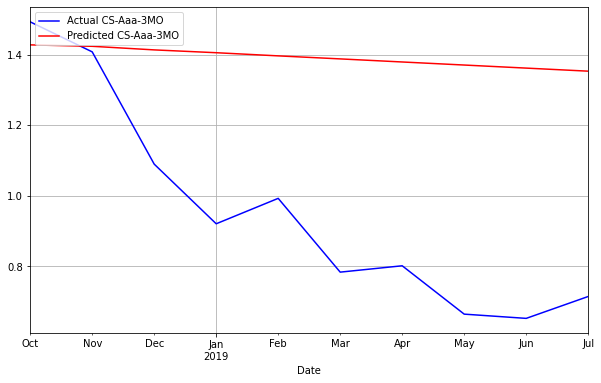

In [16]:
plt.figure(figsize=(10,6))
plt.xlabel = 'Date'

col = 'CS-Aaa-3MO'
ax1 = test[col].plot(color='blue', grid=True, label=f"Actual {col}")
ax2 = output_original[f"{col}_pred"].plot(color='red', grid=True, label=f"Predicted {col}")
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

## Calculate and forecast bias

In [17]:
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

col = 'CS-Aaa-3MO'
cs, cs_pred = col, f"{col}_pred" 
#Calculate forecast bias
forecast_errors = [test[cs][i] - output_original[cs_pred][i] for i in range(len(test[cs]))]
bias = sum(forecast_errors) * 1.0/len(test[cs])
print(f"Bias: {bias: .6f}")
#Calculate mean absolute error
mae = mean_absolute_error(test[cs], output_original[cs_pred])
print('MAE: %f' % mae)
#Calculate mean squared error and root mean squared error
mse = mean_squared_error(test[cs], output_original[cs_pred])
print(f"MSE: {mse: .6f}")
rmse = sqrt(mse)
print(f"RMSE: {rmse: .6f}")

Bias: -0.439693
MAE: 0.452734
MSE:  0.261342
RMSE:  0.511217


## Johansen Cointegration. where test statistic < critical value, then cannot reject Ho that there is atleast one con-integrating vector

In [18]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
vec_rank_trace = select_coint_rank(train, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.05)
print(vec_rank_trace.summary())

vec_rank_maxeig = select_coint_rank(train, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.05)
print(vec_rank_maxeig.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          64.15          35.01
  1   3          31.02          18.40
  2   3          9.245          3.841
-------------------------------------
Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          33.13          24.25
  1   2          21.78          17.15
  2   3          9.245          3.841
-------------------------------------


## VECM

In [19]:
import statsmodels.tsa.vector_ar.vecm as vec
vecm = vec.VECM(endog = train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

array([[1.38247468, 0.85122132, 1.5204469 ],
       [1.40601373, 0.84041709, 1.50582752],
       [1.50298295, 0.86566524, 1.56169056],
       [1.5294767 , 0.86546899, 1.52705785],
       [1.57975941, 0.87813114, 1.54142169],
       [1.64751939, 0.92105636, 1.58310821],
       [1.68569376, 0.91696594, 1.5640335 ],
       [1.70234973, 0.92313586, 1.56226533],
       [1.76390479, 0.96997932, 1.61320025],
       [1.76110849, 0.9518557 , 1.58285428]])

In [20]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print("lower bounds of confidence intervals:")
print(lower.round(3))
print("\npoint forecasts:")
print(forecast.round(3))
print("\nupper bounds of confidence intervals:")
print(upper.round(3))

lower bounds of confidence intervals:
[[1.124 0.643 1.277]
 [1.036 0.554 1.185]
 [1.01  0.484 1.15 ]
 [0.935 0.402 1.031]
 [0.914 0.364 1.   ]
 [0.927 0.36  1.003]
 [0.918 0.322 0.95 ]
 [0.902 0.297 0.919]
 [0.939 0.314 0.944]
 [0.922 0.269 0.891]]

point forecasts:
[[1.382 0.851 1.52 ]
 [1.406 0.84  1.506]
 [1.503 0.866 1.562]
 [1.529 0.865 1.527]
 [1.58  0.878 1.541]
 [1.648 0.921 1.583]
 [1.686 0.917 1.564]
 [1.702 0.923 1.562]
 [1.764 0.97  1.613]
 [1.761 0.952 1.583]]

upper bounds of confidence intervals:
[[1.641 1.06  1.764]
 [1.776 1.127 1.826]
 [1.996 1.247 1.973]
 [2.124 1.329 2.023]
 [2.246 1.392 2.083]
 [2.368 1.482 2.163]
 [2.453 1.512 2.178]
 [2.502 1.549 2.206]
 [2.589 1.626 2.282]
 [2.6   1.635 2.275]]


In [21]:
print(forecast[:,0])
# print(forecast)
import pandas as pd
x = pd.Series(forecast[:,0])

[1.38247468 1.40601373 1.50298295 1.5294767  1.57975941 1.64751939
 1.68569376 1.70234973 1.76390479 1.76110849]


In [25]:
import pandas as pd

plt.figure(figsize=(10,6))
plt.xlabel = 'Date'

f = pd.Series(forecast[:,0])
ax1 = test[var1].plot(color='blue', grid=True, label=f"Actual {var1}")
# ax2 = output_original[f"{var2}_pred"].plot(color='red', grid=True, label=f"Predicted {var2}")
ax2 = f.plot(color='red', grid=True, label=f"Predicted {var1}")
#ax1.legend(loc=1)
#ax2.legend(loc=2)
plt.show()

TypeError: index type not supported

[[ 5.94031640e-02  3.77330177e-02  3.84055301e-03]
 [ 5.88775061e-02  2.72587125e-02  2.41601638e-02]
 [-1.44949750e-01 -9.91025859e-02 -1.20718523e-01]
 [ 3.15543245e-02 -1.00842074e-02  3.27053693e-02]
 [ 1.23136102e-01 -5.99911538e-02  8.60640223e-03]
 [-9.54342307e-02 -1.26544507e-01 -4.88240955e-03]
 [ 2.44464280e-02  2.14398880e-01  2.19267095e-01]
 [-2.77999164e-02  5.22441841e-02 -5.13814748e-02]
 [-2.16332119e-01 -1.08995254e-01 -1.16875490e-01]
 [-1.53561790e-01 -1.24404560e-01 -1.22565728e-01]
 [ 1.05488096e-01 -3.51759608e-03  1.94754291e-03]
 [ 1.48435107e-01  6.00514972e-02  9.33290553e-02]
 [ 9.61236911e-02  1.58024072e-01  1.52472310e-01]
 [ 4.12242176e-01  1.82064863e-01  2.13169054e-01]
 [-3.23273507e-02  4.65712864e-02 -1.73582763e-02]
 [-1.25876569e-01 -8.75587873e-02 -1.65552110e-01]
 [ 2.44470155e-02  1.50747568e-01  2.03795266e-01]
 [ 5.93470595e-02  6.39826640e-02  1.83512048e-02]
 [-1.53010361e-01 -1.54748136e-01 -2.32928134e-01]
 [ 4.67766728e-02  9.53105966e-

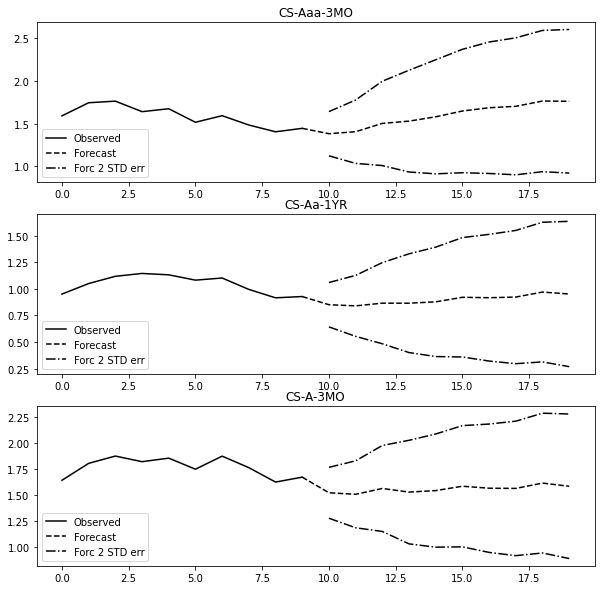

In [27]:
vecm_fit.plot_forecast(steps=10, n_last_obs=10)
# forecast_errors = [test['CS-Aaa-3MO'][i] - forecast['CS-Aaa-3MO'][i] for i in range(len(test))]

# [print(i) for i in range(len(test))]
print(vecm_fit.resid)